### <center>引入使用的包<center>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
import os
import seaborn as sns

### <center>读取文件<center>

In [132]:
train = pd.read_csv("train_users_2.csv")
test = pd.read_csv("test_users.csv")

### <center>观察数据<center>

#### 1.数据含义

In [133]:
train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [134]:
test.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


<center>从train和test文件中观察到数据train有16个feature,test有15个feature,  
<center>其中是因为test文件中少了country_destination（订房国家）这一feature，也是我们需要去预测的。  
<center>前面15个feature的含义分别是：

|feature|含义
--|:--:|
|id|用户的id
|date_account_created|账号生成时间
|timestamp_first_active|账号激活时间
|data_first_booking|第一次订房时间
|gender|性别
|age|年龄
|signup_method|注册方式
|language|使用的语言
|affiliate_channel|付费市场渠道
|affiliate_provider|付费市场渠道名称
|first_affiliate_tracked|注册前第一个接触的市场渠道
|signup_app|注册的app
|first_device_type|设备类型
|first_brower|浏览器类型

#### 2.观察一下数据量的大小类型和缺失值情况

In [135]:
print(train.shape)
print(test.shape)

(213451, 16)
(62096, 15)


In [136]:
print(train.info())
print('-----------------------------------------')
print(train.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
None
----------------------

In [137]:
print(test.info())
print('-----------------------------------------')
print(test.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB
None
-----------------------------------------
id                             0
date_account_crea

<center>从数据大小上来看：train中共有213451条数据，test里共有62096条数据。  

<center>从空值上来看：2个数据集都分别在一些feature中有空值的情况，分别是：

|空值特征数量|train|test
|--|--|--
|date_first_booking|124543|62096
|age|87990|28876
|first_affiliate_tracked|6065|20

<center>从数据类型上来：date_account_created，timestamp_first_active，date_first_booking数据类型分别是object，int64和object。  
<center>但是通过我们仔细观察数据，这三个feature都是描述时间的，所以我们考虑把它们转换为datatime格式的来操作。

### <center>数据探索<center>

##### date-accout_created（账号注册生成时间)

In [138]:
print(train.date_account_created.value_counts())
print(train.date_account_created.value_counts().describe())

2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
             ... 
2010-01-08      1
2010-04-24      1
2010-01-19      1
2010-01-03      1
2010-04-11      1
Name: date_account_created, Length: 1634, dtype: int64
count    1634.000000
mean      130.630967
std       139.327895
min         1.000000
25%        15.000000
50%        79.000000
75%       201.000000
max       674.000000
Name: date_account_created, dtype: float64


In [139]:
print(test.date_account_created.value_counts())
print(test.date_account_created.value_counts().describe())

2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
2014-07-21     888
2014-08-27     872
2014-08-26     841
2014-07-29     816
2014-08-06     790
2014-07-30     786
2014-08-12     785
2014-08-11     781
2014-08-28     772
2014-08-05     772
2014-07-28     764
2014-07-16     757
2014-07-25     754
2014-09-16     751
2014-07-31     751
2014-08-14     742
2014-08-19     741
2014-09-10     739
2014-08-07     739
2014-08-08     738
2014-07-20     738
2014-08-13     731
2014-09-03     729
2014-08-04     728
2014-08-25     725
2014-09-24     722
2014-07-19     712
2014-07-27     705
2014-09-23     701
2014-09-30     699
2014-08-01     697
2014-09-02     694
2014-09-29     693
2014-08-21     679
2014-07-26     678
2014-09-08     677
2014-09-04     671
2014-08-09     671
2014-08-18     670
2014-08-22     668
2014-07-08     665
2014-08-16     659
2014-07-15     659
2014-08-20     659
2014-09-09     658
2014-09-22     656
2014-09-18     652
2014-08-15  

把汇总后可以发现：   
看起来数据基本正常，没有异常值   
train dataset里的账号生成时间分布在1634个不同的天数内，大约是四年半；test dataset里分布了92个不同的天数，大概3个月。  
而且看起来train dataset里的天数显示是从2010年到2014年5月，而恰好test dataset里显示从2014年7月开始，那么我们可以猜测这俩个数据集或许就是依赖账号生成时间而进行分割的。我们需要证明我们的猜想。

#####  首先来看一下时间线是不是按照我们想想的情况发生的：

这里我们需要先把数据的类型进行转换，用pandas的to_datetime()函数把其转换成时间数据类型，这样我们能更容易看出数据的情况：

In [140]:
train["date_account_created"] = pd.to_datetime(train.date_account_created)
test["date_account_created"]= pd.to_datetime(test.date_account_created)
print ("Train数据显示第一天: {}，最后一天：{}".format(train.date_account_created.min(),train.date_account_created.max()))
print ("Test数据显示第一天: {}，最后一天：{}".format(test.date_account_created.min(),test.date_account_created.max()))

Train数据显示第一天: 2010-01-01 00:00:00，最后一天：2014-06-30 00:00:00
Test数据显示第一天: 2014-07-01 00:00:00，最后一天：2014-09-30 00:00:00


利用datetime后转变的时间类型我们可以直接进行画图，看一下随着日期的变动每天的date_account_created用户注册量有怎样的呈现。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Accounts created vs Year')

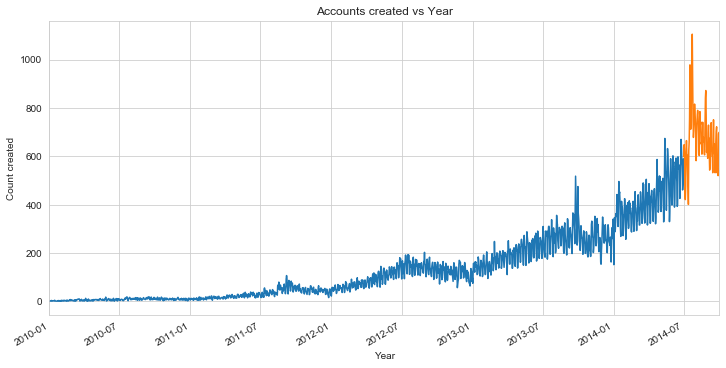

In [141]:

sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 6))
train.date_account_created.value_counts().plot('line')
test.date_account_created.value_counts().plot('line')
plt.xlabel('Year')
plt.ylabel('Count created')
plt.title('Accounts created vs Year')


我们可以看到随着时间的推移，账户的注册量越来越多，这一点证明了Airbnb的注册新用户是一个非常好的线性增长。   
同时我们需要注意有一些峰值的出现，是否说明订房日期和节假日星期天等有所关联呢？我们还需要看到一个根据星期天来划分的feature。

##### timestamp_first_active(账号激活时间）

我们还是首先观察数据类型，我们记得timestamp_first_active数据看起来像是一个时间记录的数据，不过它是一个object类型，我们需要转换。

In [142]:
print(train.timestamp_first_active.value_counts())
print(train.timestamp_first_active.value_counts().describe())

20131002011351    1
20130622024754    1
20111120235256    1
20131118144252    1
20131106211656    1
                 ..
20130719183131    1
20131022211356    1
20131022215454    1
20120508143902    1
20131104235813    1
Name: timestamp_first_active, Length: 213451, dtype: int64
count    213451.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: timestamp_first_active, dtype: float64


In [143]:
print(test.timestamp_first_active.value_counts())
print(test.timestamp_first_active.value_counts().describe())

20140905025239    1
20140806050934    1
20140714163339    1
20140804183638    1
20140812225725    1
                 ..
20140825211204    1
20140801212738    1
20140727032129    1
20140724015424    1
20140722204519    1
Name: timestamp_first_active, Length: 62096, dtype: int64
count    62096.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: timestamp_first_active, dtype: float64


我们可以发现每一个通过这样观察每一个数据都是一个比较独立的values，看起来是年月日时分秒的一个形式，那么我们需要转换一下

In [144]:
train['date_first_active'] = pd.to_datetime(train.timestamp_first_active // 1000000, format = '%Y%m%d')
test['date_first_active'] = pd.to_datetime(test.timestamp_first_active // 1000000, format = '%Y%m%d')

In [225]:
train.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active              int64
date_first_booking                 object
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
date_first_active          datetime64[ns]
dtype: object

In [145]:
print(train.date_first_active.value_counts())
print(train.date_first_active.value_counts().describe())

2014-05-13    673
2014-06-24    670
2014-06-25    635
2014-05-20    631
2014-05-14    622
             ... 
2010-01-01      1
2010-06-18      1
2010-01-08      1
2010-01-02      1
2010-04-01      1
Name: date_first_active, Length: 1639, dtype: int64
count    1639.000000
mean      130.232459
std       139.225606
min         1.000000
25%        15.000000
50%        79.000000
75%       201.000000
max       673.000000
Name: date_first_active, dtype: float64


In [227]:
train.date_first_active.isnull().sum()

0

In [146]:
print(test.date_first_active.value_counts())
print(test.date_first_active.value_counts().describe())

2014-07-23    1105
2014-07-22    1052
2014-07-17     978
2014-07-24     923
2014-07-18     892
2014-07-21     888
2014-08-27     872
2014-08-26     841
2014-07-29     816
2014-08-06     790
2014-07-30     786
2014-08-12     785
2014-08-11     781
2014-08-05     772
2014-08-28     772
2014-07-28     764
2014-07-16     757
2014-07-25     754
2014-09-16     751
2014-07-31     751
2014-08-14     742
2014-08-19     741
2014-09-10     739
2014-08-07     739
2014-07-20     738
2014-08-08     738
2014-08-13     731
2014-09-03     729
2014-08-04     728
2014-08-25     725
2014-09-24     722
2014-07-19     712
2014-07-27     705
2014-09-23     701
2014-09-30     699
2014-08-01     697
2014-09-02     694
2014-09-29     693
2014-08-21     679
2014-07-26     678
2014-09-08     677
2014-09-04     671
2014-08-09     671
2014-08-18     670
2014-08-22     668
2014-07-08     665
2014-08-20     659
2014-07-15     659
2014-08-16     659
2014-09-09     658
2014-09-22     656
2014-09-18     652
2014-08-15  

好了我们给把时间戳形式的这一类数据转换成了时间类型的数据，然后确定数据数值基本没有异常，进行画图。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'First actived vs Year')

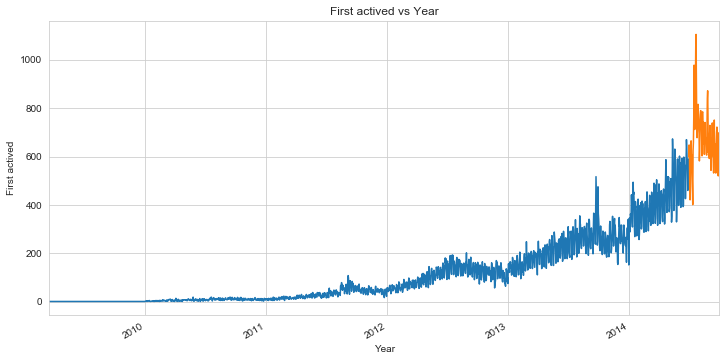

In [147]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
train.date_first_active.value_counts().plot('line')
test.date_first_active.value_counts().plot('line')
plt.xlabel('Year')
plt.ylabel('First actived')
plt.title("First actived vs Year")

可以发现timestamp_first_active和date_account_created数据表现基本类似。都是随着时间的推移，注册量和激活量显著增加。同样存在峰值，在做特征工程的时候需要注意把时间这部分数据分成几个小的feature。

##### data_first_booking(第一次订房时间）

In [148]:
train.date_first_booking.describe()

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

In [149]:
test.date_first_booking.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: date_first_booking, dtype: float64

第一次订房时间在train里存在一半以上的空值，在test dataset里更是全部是空值，怕由于我们改动给未来模型增加noise，所以我们会选择删除这个feature。

##### gender(性别)

我们之前观察性别里有存在unknown的情况，那我们先看一下这一feature下有几个类型的数据。

In [150]:
print('Train dataset中性别分布为：\n ',  train.gender.value_counts(dropna = False))
print('Test dataset中性别分布为：\n ',test.gender.value_counts(dropna = False))

Train dataset中性别分布为：
  -unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64
Test dataset中性别分布为：
  -unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: gender, dtype: int64


unknown的值有很多，尝试把它们变成空值进行处理。

In [151]:
train.gender.replace('-unknown-', np.nan, inplace=True)
test.gender.replace('-unknown-', np.nan, inplace=True)

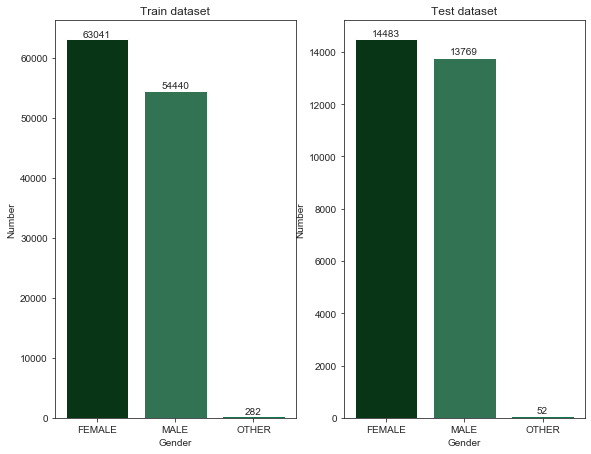

In [152]:
sns.set_style('ticks')
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.bar(train.gender.value_counts().index,train.gender.value_counts(),color=['#073515','#327353','#107850','#529214'])
for i in range(3):
    dd = train.gender.value_counts().index[i]
    ff = train.gender.value_counts().values[i]
    plt.text(dd,ff+50,'%.0f' % ff, ha='center', va='bottom', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title("Train dataset")
plt.subplot(1,2,2)
plt.bar(test.gender.value_counts().index,test.gender.value_counts(),color=['#073515','#327353','#107850','#529214'])
for i in range(3):
    dd = test.gender.value_counts().index[i]
    ff = test.gender.value_counts().values[i]
    plt.text(dd,ff+50,'%.0f' % ff, ha='center', va='bottom', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title("Test dataset")

plt.subplots_adjust(left=0.04, top=0.96, right = 0.96, bottom = 0.04)

我们用柱状图可视化一下，画图的步骤可能有些繁琐，以后加以改进。通过图中我们可以看出除了空值的话，女性比男性要多一些，那么我们也想到了各个国家的风俗习惯可能会有所差异，一起去旅游度假的时候，有的国家男性订房比较多，有的国家女性来掌管这项事务，我们针对于性别和订房国家来看一下他们之间的关系。又由于我们的数据条件下，训练集中有订房国家，所以这里我们只采用训练集来看一下这俩个特征之间的关系情况。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py

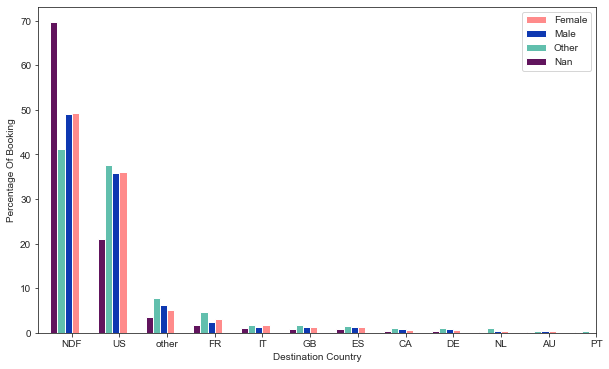

In [153]:
plt.figure(figsize=(10, 6))
female = sum(train.gender == 'FEMALE')
male = sum(train.gender == 'MALE')
other = sum(train.gender == 'OTHER')
Nan = sum(train.gender.isnull())

female_destinations = train.loc[train.gender == 'FEMALE', 'country_destination'].value_counts()/female *100
male_destinations = train.loc[train.gender == 'MALE', 'country_destination'].value_counts() /male *100
other_destinations = train.loc[train.gender == 'OTHER', 'country_destination'].value_counts()/other*100 
nan_destinations = train.loc[train.gender.isnull(), 'country_destination'].value_counts()/Nan*100 

female_destinations.plot('bar', width = 0.15, color =  '#FF8B8B', position = 0, label = 'Female', rot = 0)
male_destinations.plot('bar', width = 0.15, color = '#0E38B1', position = 1, label = 'Male', rot = 0)
other_destinations.plot('bar', width = 0.15, color =  '#61BFAD', position = 2, label = 'Other', rot = 0)
nan_destinations.plot('bar', width = 0.15, color =  '#61145D',position = 3, label = 'Nan', rot = 0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage Of Booking')
plt.show()

结论并不如我们期待那么乐观，基本上男女订房比例是在一个相似的水平没有很明显的区别,F(Not Destination Found;无目的地)这一类别中空值比例很高

##### Age(年龄)

我们之前查看空值的时候记得age在train和test里面都有空值的情况，我们再来看一下数据描述。

In [154]:
print(train.age.value_counts())
print(train.age.describe())
print(test.age.value_counts())
print(test.age.describe())

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
27.0      5738
33.0      5527
26.0      5044
34.0      5029
35.0      4860
25.0      4459
36.0      4083
37.0      3694
38.0      3384
24.0      3220
39.0      2998
40.0      2766
41.0      2538
23.0      2462
42.0      2243
45.0      2149
44.0      2137
43.0      2056
46.0      1875
22.0      1702
47.0      1646
48.0      1469
50.0      1387
51.0      1337
49.0      1331
52.0      1210
105.0     1131
19.0      1102
53.0      1098
54.0      1019
55.0      1011
21.0       982
56.0       941
57.0       915
58.0       823
59.0       780
60.0       734
2014.0     710
61.0       680
18.0       669
62.0       593
63.0       573
64.0       549
20.0       540
65.0       516
66.0       435
67.0       402
68.0       373
69.0       276
70.0       259
110.0      196
72.0       189
71.0       180
73.0       149
74.0       123
75.0        94
77.0        72
76.0        68
17.0        67
79.0        50
78.0        50
95.0      

出现了最大年龄2014,2002的值，这一点数据异常值很多，我们猜测是把出发日期或者是出生日期填错了，根据我们的经验我们需要年龄设置一个有效区间。   
根据人类最长寿命者Jeanne Calment的122岁到18岁的合法身份，我们先观察一下异常数据情况：

In [155]:
print('Train中Age异常值：')
print(sum(train.age>122)+sum(train.age<18))
print('Test中Age异常值：')
print(sum(test.age>122)+sum(test.age<18))

Train中Age异常值：
939
Test中Age异常值：
79


In [156]:
print(train[train.age > 122]['age'].describe())
print(test[test.age > 122]['age'].describe())

count     781.000000
mean     2006.308579
std        95.711349
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64
count      49.000000
mean     1943.836735
std        25.493747
min      1920.000000
25%      1927.000000
50%      1934.000000
75%      1947.000000
max      2002.000000
Name: age, dtype: float64


In [157]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',300)

25/50/75分位数显示Train中2014这个值比较多，和我们猜想填错注册时间基本验证，训练集是从2010年的数据开始那么我们看一下age大于2009的有多少：


In [158]:
train[train.age > 2009].age

388       2014.0
673       2014.0
1040      2014.0
1177      2013.0
1200      2014.0
           ...  
187389    2014.0
188301    2014.0
190412    2014.0
190941    2014.0
191260    2014.0
Name: age, Length: 749, dtype: float64

占据异常值的大部分，我们把它们转换为空值后，我们再看一下其他大于122岁的：

In [159]:
train.loc[train.age > 2009, 'age'] = np.nan

In [160]:
train[train.age > 122].age

41046     1949.0
55474     1931.0
59537     1932.0
67223     1932.0
67610     1932.0
81999     1928.0
102044    1936.0
104695    1933.0
114377    1935.0
114599    1925.0
118621    1952.0
144698     150.0
145422    1927.0
156511     132.0
157181    1931.0
157318    1953.0
160781    1942.0
165271    1995.0
178116    2008.0
180961    1928.0
180995    1924.0
184424    1936.0
189661    1929.0
190142    1949.0
190565    1931.0
194056    1929.0
196558    1947.0
197386    1938.0
198888    1924.0
206249    1947.0
208819    1949.0
211496    1926.0
Name: age, dtype: float64

除了150和132这俩个数据比较特殊外，其他的数据像是出生年份，我们用Train中平均注册年份2012来减去这异常值，还原年龄。

In [161]:
train.age[train.age>122]= train.age[train.age>122].apply(lambda x:2012-x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


对于test数据用类似的方法，数据产生的日期年份（2014年)减去这一类异常值，还原年龄：

In [162]:
test.age[test.age>122]= test.age[test.age>122].apply(lambda x:2014-x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


看一下小于18岁的异常值：

In [163]:
print(train[train.age <18]['age'].describe())

count    160.000000
mean      12.181250
std        5.927096
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64


In [164]:
print(test[test.age <18]['age'].describe())

count    37.000000
mean     14.972973
std       3.692985
min       1.000000
25%      15.000000
50%      16.000000
75%      17.000000
max      17.000000
Name: age, dtype: float64


从train和test数据表示16岁以上订房人群在平台或许是被准许的，所以我们可以把区间订的下限再降低一些。
我们可以根据常识再最后把年龄数据大于95，小于13的转换为空值：

In [165]:
train.loc[train.age > 95, 'age'] = np.nan
train.loc[train.age < 13, 'age'] = np.nan
test.loc[test.age > 95, 'age'] = np.nan
test.loc[test.age < 13, 'age'] = np.nan

我们将处理好的Age年龄数据可视化一下，看一下分布情况：

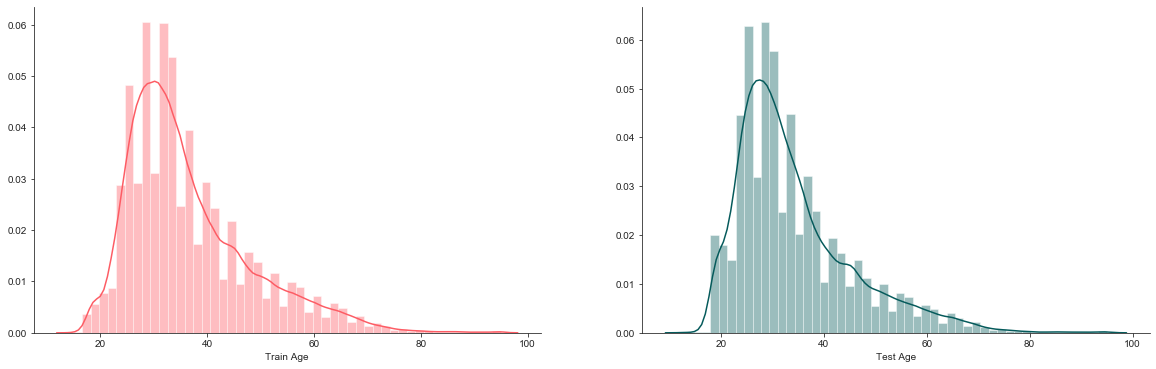

In [166]:
sns.set_style('ticks')
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.distplot(train.age.dropna(), color='#FD5C64')
plt.xlabel('Train Age')
sns.despine()
plt.subplot(1,2,2)
sns.distplot(test.age.dropna(), color='#055A5B')
plt.xlabel('Test Age')
sns.despine()

从上图可以看出明显订房年龄在25岁到40岁中间人数最多。那么我们再看一下年轻人和老年人是否对于目的地有所不同呢？我们用45岁来区别一下老年人和年轻人：

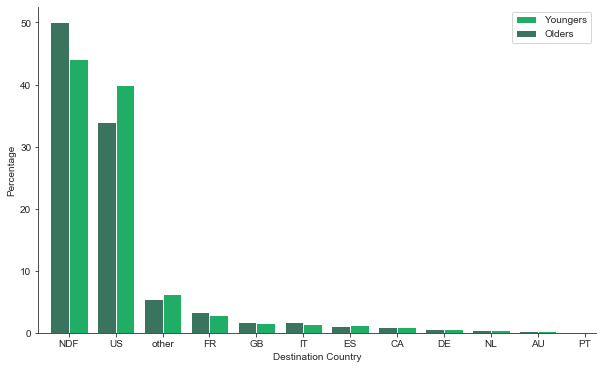

In [167]:
age = 45
width = 0.4
plt.figure(figsize=(10, 6))

younger = sum(train.loc[train['age'] < age, 'country_destination'].value_counts())
older = sum(train.loc[train['age'] > age, 'country_destination'].value_counts())

younger_destinations = train.loc[train['age'] < age, 'country_destination'].value_counts()/younger * 100
older_destinations = train.loc[train['age'] > age, 'country_destination'].value_counts()/older * 100

younger_destinations.plot(kind='bar',width = 0.4, color='#20AD65', position=0, label='Youngers', rot=0) 
older_destinations.plot(kind='bar', width = 0.4,color='#3A745F', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [168]:
print(train.age.isnull().value_counts())
print(test.age.isnull().value_counts())

False    122995
True      90456
Name: age, dtype: int64
False    32907
True     29189
Name: age, dtype: int64


按照45岁来区分的话，可以看出年轻人更多选择在美国旅行，老人出国旅行的意愿更强烈。但是我们还是要记得在年龄数据中大概有45%的空值。

##### Signup_method(注册方式)

In [169]:
print(train.signup_method.value_counts())
print(test.signup_method.value_counts())

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
basic       45325
facebook    14856
google       1892
weibo          23
Name: signup_method, dtype: int64


关于注册方式明显是一个分类的feature，看出大多数是basic，自建站的意思，我们可视化一下：

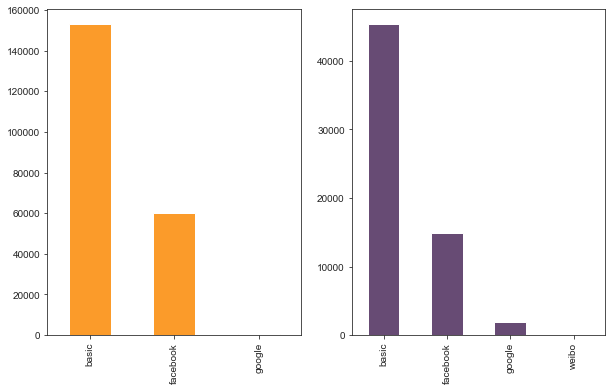

In [170]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
train.signup_method.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.signup_method.value_counts().plot(kind='bar',color='#674B74')

weibo 应该是中国注册的，其余这一feature没有缺失值，也没有异常值。

##### Signup_flow(注册页面)

In [171]:
print(train.signup_flow.value_counts())
print(test.signup_flow.value_counts())

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64
0     41353
25    15175
23     3573
12     1915
8        75
14        4
21        1
Name: signup_flow, dtype: int64


我们能看到用户从各个不同的页面进入到注册页面进行注册的，有很多个类别，大多数是代号‘0’的页面。

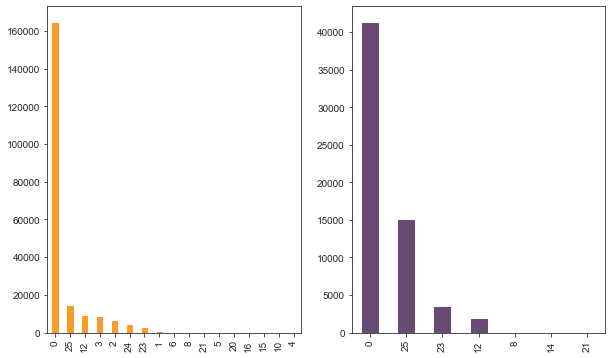

In [172]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
train.signup_flow.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.signup_flow.value_counts().plot(kind='bar',color='#674B74')

##### Language(语言)

In [173]:
print(train.language.value_counts())
print(test.language.value_counts())

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64
en           59224
zh            1002
ko             369
fr             336
es             259
de             245
ja             120
it             119
ru             119
pt              82
sv              54
nl              37
tr              28
pl              21
no              21
cs              17
da              17
hu               7
fi               6
el               6
th               4
-unknown-        1
id               1
ca               1
Name: language, dtype: int64


既然想要预测客户在哪里订房，语言这一特征必然起到很大作用，我们可以看一下。

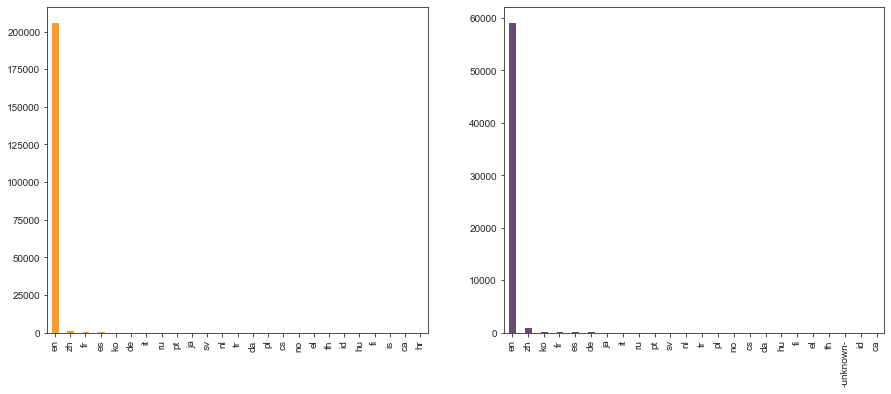

In [174]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
train.language.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.language.value_counts().plot(kind='bar',color='#674B74')

基本上大多数是使用英语，这也在我们意料之中，毕竟Airbnb在United Stated本国推广程度更高一些。

##### Affiliate_Channel (付费市场渠道）

In [175]:
print(train.affiliate_channel.value_counts())
print(test.affiliate_channel.value_counts())

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64
direct           43844
sem-brand        10394
seo               5699
sem-non-brand     1231
other              586
remarketing        172
content            170
Name: affiliate_channel, dtype: int64


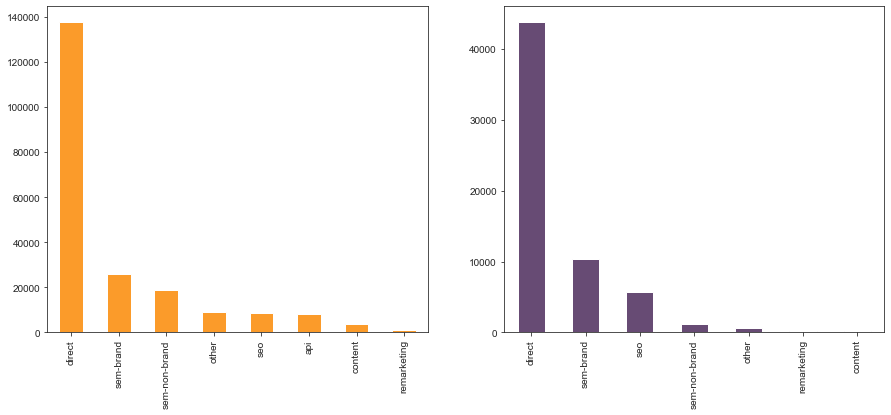

In [176]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
train.affiliate_channel.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.affiliate_channel.value_counts().plot(kind='bar',color='#674B74')

各种引流渠道中，大多数是直接的用户引流过来的

##### Affiliate_Provider (付费市场渠道名称）

In [177]:
print(train.affiliate_provider.value_counts())
print(test.affiliate_provider.value_counts())

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64
direct                 43844
google                 14263
facebook                1723
bing                    1391
other                    487
yahoo                    157
email-marketing          104
padmapper                 68
facebook-open-graph       21
naver                     14
meetup                    11
craigslist                 4
baidu                      3
daum                       2
gsp            

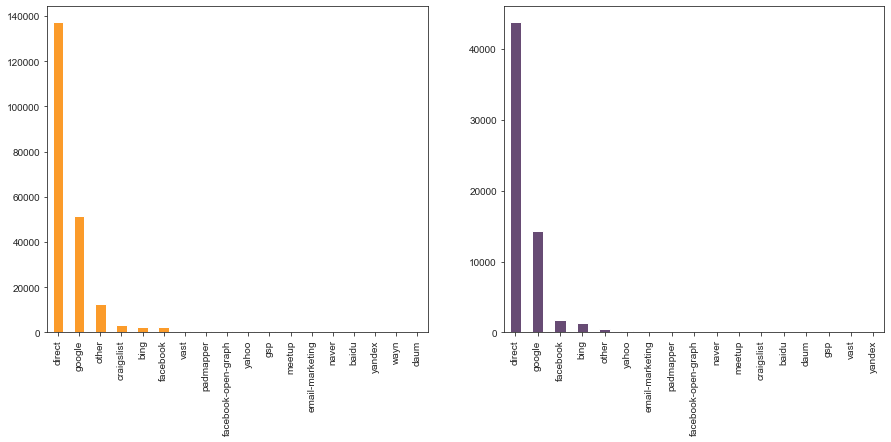

In [178]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
train.affiliate_provider.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.affiliate_provider.value_counts().plot(kind='bar',color='#674B74')

除了直接过来的客户外，google引流渠道的效果很不错

##### First_Affiliate_Tracked (注册前第一个接触的市场渠道）

In [179]:
train.first_affiliate_tracked.isnull().sum()

6065

In [180]:
test.first_affiliate_tracked.isnull().sum()

20

有一些空值在这个feature里面

In [181]:
print(train.first_affiliate_tracked.value_counts())
print(test.first_affiliate_tracked.value_counts())

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64
untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
Name: first_affiliate_tracked, dtype: int64


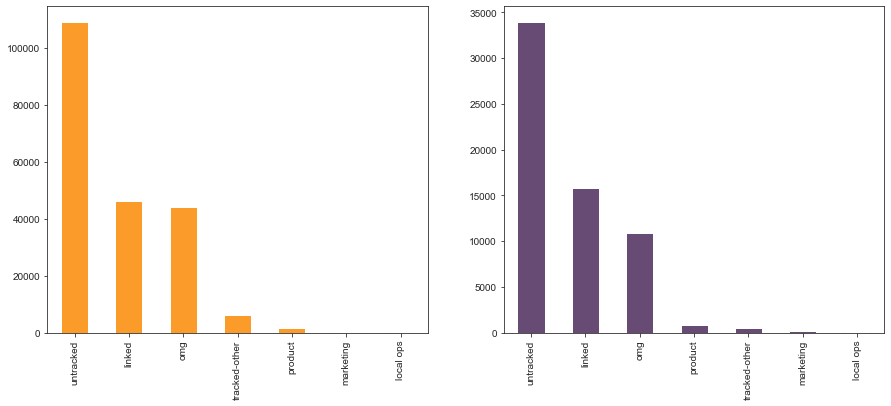

In [182]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
train.first_affiliate_tracked.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.first_affiliate_tracked.value_counts().plot(kind='bar',color='#674B74')

没接触过占大多数，其余的在lined（领英）上获取消息的比较多。

##### Signup_App(注册APP）

In [183]:
print(train.signup_app.value_counts())
print(test.signup_app.value_counts())

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64
Web        37201
iOS        15574
Android     5065
Moweb       4256
Name: signup_app, dtype: int64


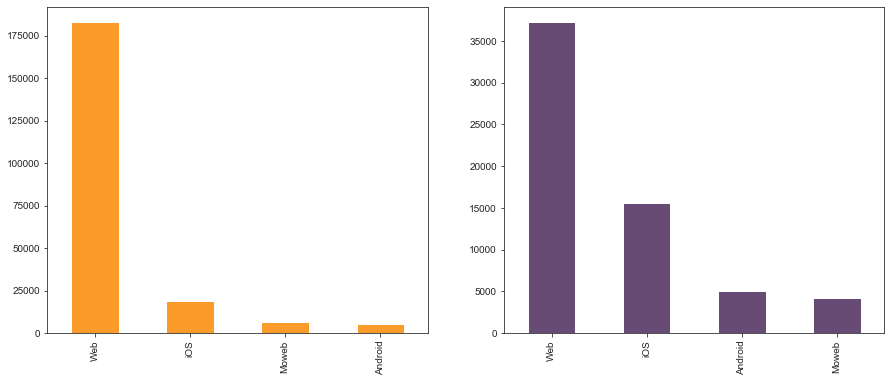

In [184]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
train.signup_app.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.signup_app.value_counts().plot(kind='bar',color='#674B74')

可以发现大多数使用Web端登陆的。

##### First_Device_Type(设备类型）

In [185]:
print(train.first_device_type.value_counts())
print(test.first_device_type.value_counts())

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64
iPhone                19055
Mac Desktop           16728
Windows Desktop       14232
Android Phone          6655
iPad                   3697
Android Tablet          806
Other/Unknown           500
Desktop (Other)         308
SmartPhone (Other)      115
Name: first_device_type, dtype: int64


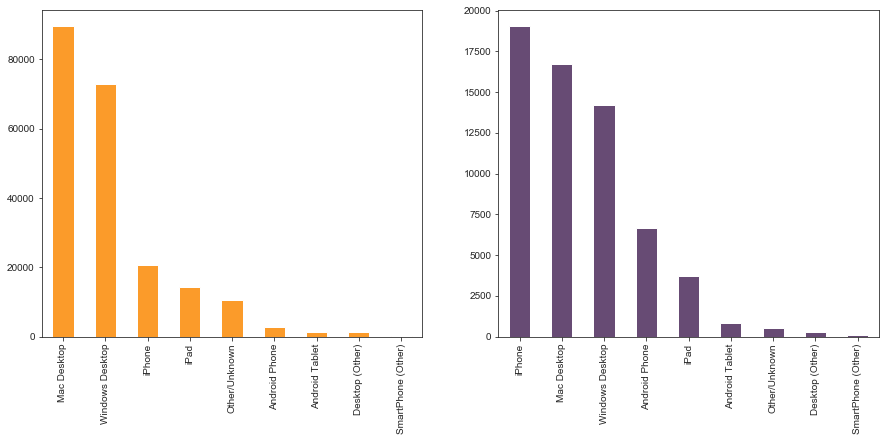

In [186]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
train.first_device_type.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.first_device_type.value_counts().plot(kind='bar',color='#674B74')

台式苹果的使用度比较高，而且苹果系列产品使用情况都挺高的

##### First_Browser (浏览器类型）

In [187]:
print(train.first_browser.value_counts())
print(test.first_browser.value_counts())

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
Comodo Dra

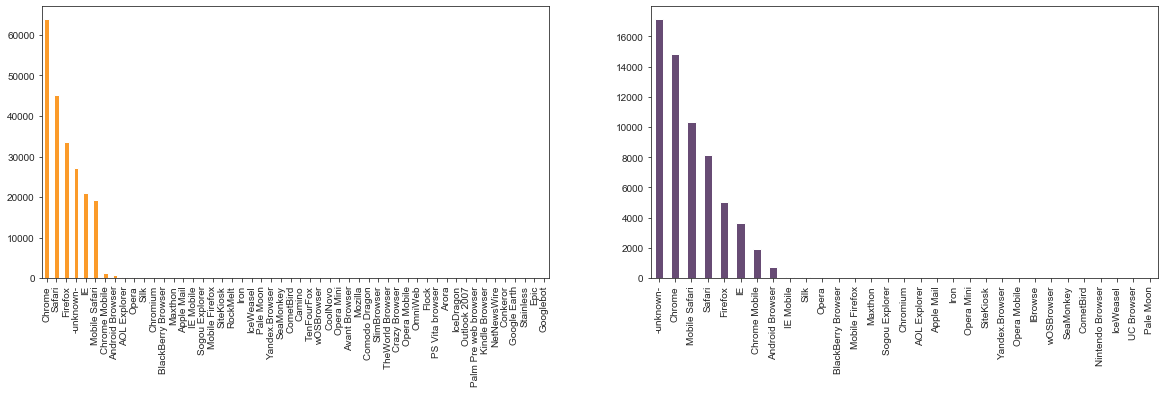

In [188]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
train.first_browser.value_counts().plot(kind='bar',color='#FB9B2A')

plt.subplot(1,2,2)
test.first_browser.value_counts().plot(kind='bar',color='#674B74')

我们这个train.csv数据探索结束后，我们来看一下sessions文件的数据情况：

In [189]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


## Sessions(用户操作集)文件

In [190]:
sessions = pd.read_csv('sessions.csv')

In [191]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,jpmpj40cvk,lookup,NaN,NaN,Windows Desktop,957.0


In [192]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
user_id          1045778 non-null object
action           1040702 non-null object
action_type      905478 non-null object
action_detail    905478 non-null object
device_type      1048575 non-null object
secs_elapsed     1037508 non-null float64
dtypes: float64(1), object(5)
memory usage: 48.0+ MB


In [193]:
sessions.shape

(1048575, 6)

In [194]:
sessions.isnull().sum()

user_id            2797
action             7873
action_type      143097
action_detail    143097
device_type           0
secs_elapsed      11067
dtype: int64

sessions文件中官方说明有6个feature，共有1048575条数据，数据类型方面没有问题；空值方面除了device_type没有空值外，其余的都有一些空值。我们也能看到这份数据是有关用户操作的数据。   
各个feature的含义分别是：

|feature|含义
--|:--:|
|user_id|用户的id
|action|用户行为
|action_type|用户行为类型
|action_detail|用户行为细节
|device_type|设备类型
|secs_elapsed|停留时长

##### User_id

通过观察数据，我们可以发现有一些id是一样的，那么这个数据集是用户进行每一个操作都会记录下来，所以我们看一下不同的用户数有多少：

In [195]:
len(sessions.user_id.unique())

15589

记得user_id是有空值的，我们可以把user_id的空值删除掉：

In [196]:
sessions.user_id.isnull().sum()

2797

In [197]:
sessions.dropna(axis = 0, subset = ['user_id'],inplace= True )

100多万条数据，平均每人约67个左右操作的次数，那么我们按照id把数据分组，总结一个每个用户点击次数的feature：

In [198]:
df_sess = sessions.groupby(['user_id']).user_id.count().reset_index(name = 'session_count')
df_sess

,user_id,session_count
0,007gj7kqdk,9
1,009a40t3dk,26
2,00allnceb8,1
3,00e8bokexa,3
4,00fhpdik5t,27
...,...,...
15583,zzqb2sn066,10
15584,zzrnx9rqi5,26
15585,zzv8sgicbk,25
15586,zzvatt4dio,422


##### Action(用户行为)

In [199]:
print(sessions.action.value_counts())
print(sessions.action.value_counts().describe())

show                                 209013
search_results                       109219
personalize                          105386
lookup                                88039
ajax_refresh_subtotal                 71275
index                                 69239
similar_listings                      53641
update                                38646
search                                26486
header_userpic                        17294
create                                17222
track_page_view                       17043
active                                15795
social_connections                    15239
collections                           12699
dashboard                              9520
calendar_tab_inner2                    9318
ajax_check_dates                       8383
edit                                   7712
confirm_email                          7412
ask_question                           6982
requested                              6242
authenticate                    

可以看出用户行为细分为很多个类别，有的只有一次操作，这个特征缺少普适性，我们考虑把操作少统一归到一类：

In [200]:
sessions.action = sessions.action.fillna('NAN')
act_freq = 100
act = dict(zip(*np.unique(sessions.action, return_counts=True)))
sessions.action = sessions.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)

我们试了一下用zip函数把频率小于1的都改名叫'OTHER'，由于原本的action有空值，不好用zip，所以我们把空值标出了'NAN'，我们后续会把其他feature的空值也转换一下。

In [201]:
sessions.action.value_counts()

show                              209013
search_results                    109219
personalize                       105386
lookup                             88039
ajax_refresh_subtotal              71275
index                              69239
similar_listings                   53641
update                             38646
search                             26486
header_userpic                     17294
create                             17222
track_page_view                    17043
active                             15795
social_connections                 15239
collections                        12699
dashboard                           9520
calendar_tab_inner2                 9318
ajax_check_dates                    8383
NAN                                 7860
edit                                7712
confirm_email                       7412
ask_question                        6982
requested                           6242
authenticate                        6015
other_hosting_re

In [202]:
sessions.action_type = sessions.action_type.fillna('NAN')
sessions.action_detail = sessions.action_detail.fillna('NAN')
sessions.device_type = sessions.device_type.fillna('NAN')

##### Action_type 用户行为类型

In [203]:
sessions.action_type.value_counts()

view                246673
click               240942
data                221185
NAN                 142544
-unknown-           102728
submit               76042
message_post         12350
booking_request       2393
partner_callback       920
booking_response         1
Name: action_type, dtype: int64

有我们处理的空值，还有一个unknown的值，我们都转为空值NAN:

In [204]:
sessions.action_type.replace('-unknown-', 'NAN', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


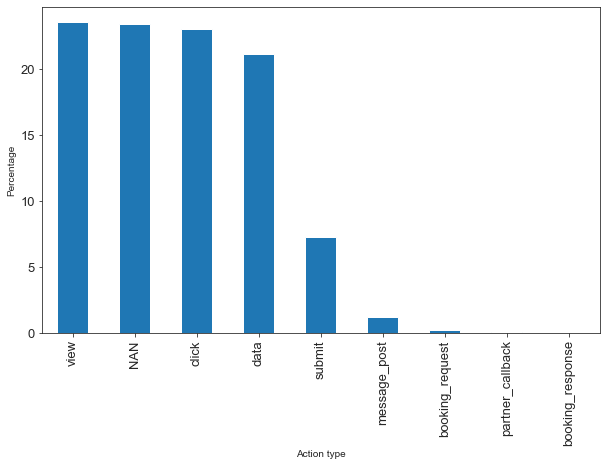

In [205]:
at = sessions.action_type.value_counts(dropna = False) / sessions.shape[0] * 100
plt.figure(figsize = (10, 6))
plt.xlabel('Action type')
plt.ylabel('Percentage')
at.plot('bar', fontsize = 13)

##### Action_detail （用户行为细节）

In [206]:
sessions.action_detail.value_counts()

view_search_results              186166
NAN                              142544
wishlist_content_update          110759
-unknown-                        102728
p3                               100847
change_trip_characteristics       75020
similar_listings                  56371
update_listing                    32444
user_profile                      26703
header_userpic                    18285
user_wishlists                    16429
user_social_connections           15790
contact_host                      12697
message_post                      12350
message_thread                    10392
dashboard                         10045
change_contact_host_dates          8794
create_user                        8465
edit_profile                       8067
confirm_email_link                 7778
login                              6202
user_profile_content_update        5795
p5                                 5047
unavailable_dates                  4829
create_phone_numbers               4653


同样地，有我们处理的空值，还有一个unknown的值，我们都转为空值NAN:

In [207]:
sessions.action_detail.replace('-unknown-', 'NAN', inplace=True)

In [208]:
len(sessions.action_detail.value_counts())

107

In [209]:
sessions.action_detail.value_counts().describe()

count       107.000000
mean       9773.626168
std       33577.188929
min           1.000000
25%          52.000000
50%         754.000000
75%        3197.500000
max      245272.000000
Name: action_detail, dtype: float64

因为网站上有众多按钮，如果细节太多可能也会导致模型过拟合，所以我们根据25分位数，50分位数，75分位数把它们整合一下：

In [210]:
detail_25 = 52
detail_50 = 754
detail_75 = 3197
act_dea = dict(zip(*np.unique(sessions.action_detail, return_counts=True)))
sessions.action_detail = sessions.action_detail.apply(lambda x: '25_detail' if act_dea[x] < detail_25  else ('50_detail' if act_dea[x] < detail_50 else ('75_detail' if act_dea[x] < detail_75 else x)))

In [211]:
sessions.action_detail.value_counts()

NAN                            245272
view_search_results            186166
wishlist_content_update        110759
p3                             100847
change_trip_characteristics     75020
similar_listings                56371
75_detail                       39679
update_listing                  32444
user_profile                    26703
header_userpic                  18285
user_wishlists                  16429
user_social_connections         15790
contact_host                    12697
message_post                    12350
message_thread                  10392
dashboard                       10045
change_contact_host_dates        8794
create_user                      8465
edit_profile                     8067
confirm_email_link               7778
login                            6202
user_profile_content_update      5795
50_detail                        5740
p5                               5047
unavailable_dates                4829
create_phone_numbers             4653
listing_revi

##### Device_type （设备类型）

In [212]:
sessions.device_type.value_counts()

Mac Desktop                         477529
Windows Desktop                     325390
Android App Unknown Phone/Tablet     97614
iPad Tablet                          71873
iPhone                               43349
-unknown-                            16238
Tablet                                5322
Linux Desktop                         3467
Chromebook                            3014
Android Phone                         1606
iPodtouch                              289
Blackberry                              53
Windows Phone                           29
Opera Phone                              5
Name: device_type, dtype: int64

In [213]:
sessions.device_type.replace('-unknown-', 'NAN', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


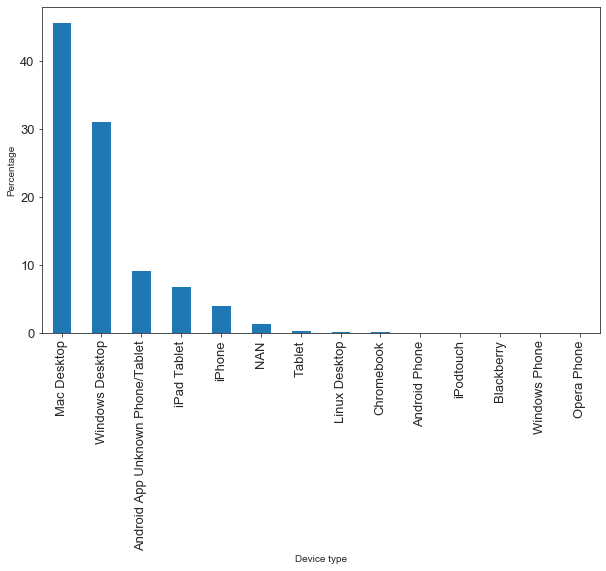

In [214]:
at = sessions.device_type.value_counts(dropna = False) / sessions.shape[0] * 100
plt.figure(figsize = (10, 6))
plt.xlabel('Device type')
plt.ylabel('Percentage')
at.plot('bar', fontsize = 13)

##### Secs_elapsed （停留时长）

In [215]:
sessions.secs_elapsed.value_counts()

0.0         7219
4.0         1914
3.0         1909
2.0         1839
1.0         1839
            ... 
71619.0        1
46708.0        1
286492.0       1
286501.0       1
260993.0       1
Name: secs_elapsed, Length: 114308, dtype: int64

In [216]:
sessions.secs_elapsed.isnull().sum()

11026

In [217]:
sessions.secs_elapsed.value_counts().describe()

count    114308.000000
mean          9.052315
std          58.180683
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        7219.000000
Name: secs_elapsed, dtype: float64

In [126]:
sessions.secs_elapsed = sessions.secs_elapsed.fillna(0)

In [85]:
secs = sessions.groupby(['user_id']).secs_elapsed.sum().reset_index()
secs.columns = ['user_id', 'secs_elapsed']
secs.describe()

,secs_elapsed
count,1.558800e+04
mean,1.437976e+06
std,1.832534e+06
min,0.000000e+00
25%,2.233832e+05
50%,8.309845e+05
75%,1.960356e+06
max,3.139369e+07


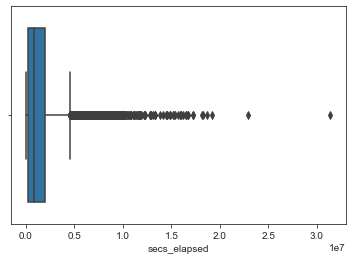

In [86]:
sns.boxplot(x = secs.secs_elapsed)

In [90]:
train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                         90456
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
date_first_active               0
dtype: int64

## 保存下来：

In [130]:

sessions.to_csv('sessions_3_1.csv')